# Task 4.9 Part 2

## Step 1

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pickle

In [6]:
# filepath for instacart_basket.pkl

instacart_basket_df_filepath = '/Users/daphne/Downloads/Instacart Basket Analysis/02 Data/Prepared Data/instacart_basket_df.pkl'

In [7]:
# Open and read file


with open(instacart_basket_df_filepath, 'rb') as file:
    df_insta_full = pickle.load(file)

In [8]:
df_insta_full.shape

(32404859, 34)

In [10]:
df_insta_full.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Step 3

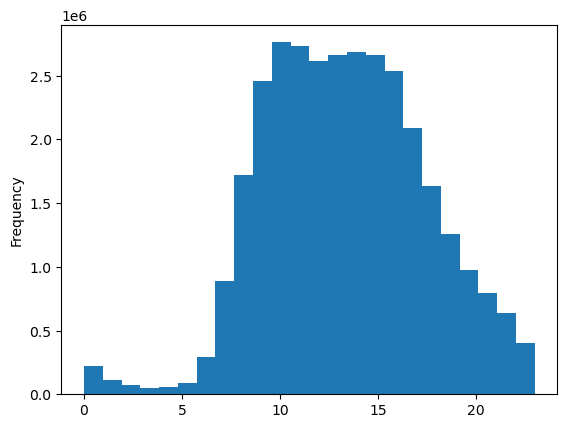

In [19]:
# Histogram for order_hour_of_day

order_hour_of_day_hist = df_insta_full['order_hour_of_day'].plot.hist(bins = 24)

Instacart's peak hours are 9-16. Instacart's lowest hours are 0-7. Instacart gets the most buisness during the day and evening.

## Step 4

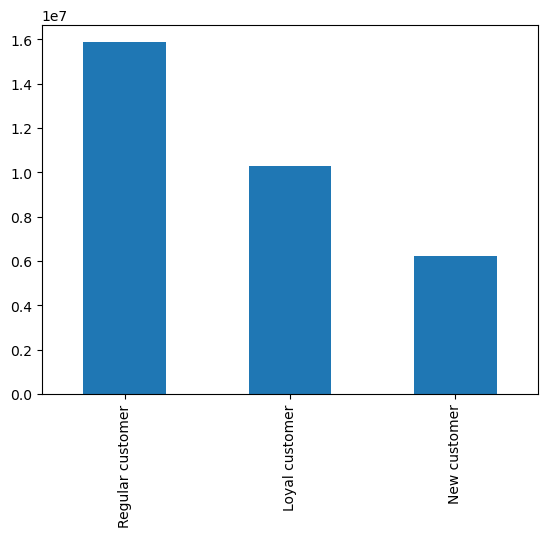

In [18]:
# loyalty_flag bar chart

loyalty_flag_bar = df_insta_full['loyalty_flag'].value_counts().plot.bar()

'Regular customers' make the highest population of instacart users.

## Step 5

In [20]:
# Creating a subset

np.random.seed(4)
dev = np.random.rand(len(df_insta_full)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# Store 70% of the DF big

big = df_insta_full[dev]

In [25]:
# Store 30% of the DF small

small = df_insta_full[~dev]

In [26]:
len(df_insta_full)

32404859

In [27]:
len(big) + len(small)

32404859

In [29]:
# Removing columns and renaming small 

df_2 = small[['prices', 'order_hour_of_day']]

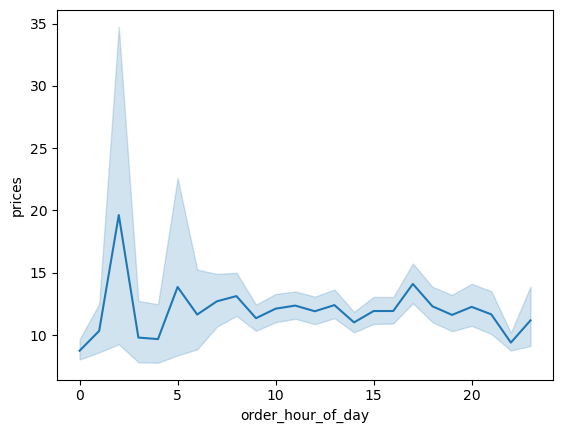

In [51]:
# Creating line plot

line_price_ohod = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

There is no consistant pattern. It looks like there is a peak in prices at 2 but that doesn't say much.

## Step 6

In [43]:
# Naming new subset

df_3 = small[['age', 'n_dependants']]

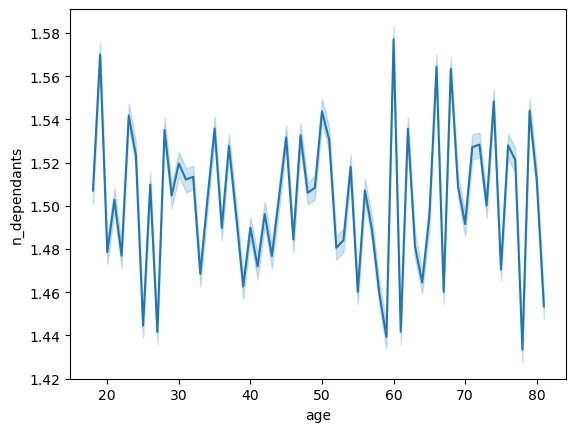

In [48]:
# Creating line plot

line_age_dep = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

There is no consistant pattern. 

## Step 7

In [45]:
# Naming new subset

df_4 = small[['age', 'income']]

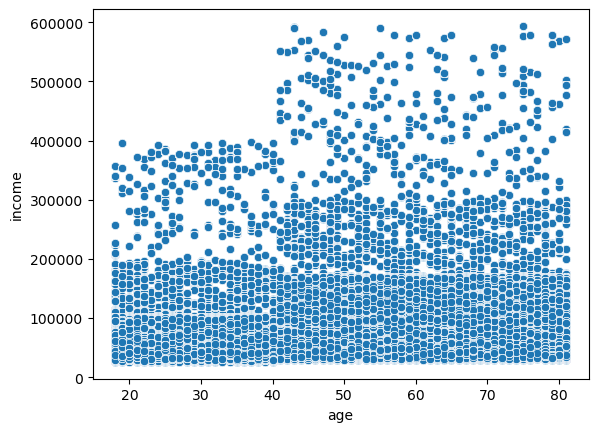

In [50]:
# Creating line plot

scatter_age_income = sns.scatterplot(data = df_4, x = 'age', y = 'income')

Most instacart users make under 200k. The users that make a drastically higher income are all 40-80 years old. This scatter plot shows that income rises with age, especially after 40.